<a href="https://colab.research.google.com/github/Ranzor234/Komputasi-Intelegensia/blob/main/EndTerm/End_Term_Task_AthallaKarenzaZimraan_2206826450.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import datetime
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Importing the Keras libraries and packages
from keras.models import Sequential  # linear stack of layers
from keras.layers import Dense
from keras.layers import LSTM        # Long Short-Term Memory layer
from keras.layers import Dropout

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/sivaram1987/google-stock-price")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: athallakarenza
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sivaram1987/google-stock-price


100%|██████████| 22.8k/22.8k [00:00<00:00, 13.0MB/s]

In [ ]:
od.download("https://www.kaggle.com/datasets/sivaram1987/google-stock-pricetest")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: athallakarenza
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sivaram1987/google-stock-pricetest


100%|██████████| 646/646 [00:00<00:00, 418kB/s]

In [ ]:
# Configuration

SHARE = 'AAPL'
SERVICE = 'fred' #'quandl' #'yahoo'

PREDICTORS = ['Open']  #['High', 'Low', 'Open']   # column names with prices
TARGET = 'Open'

TIMESTEP = 90  # the number of previous days used for prediction

START_DATE = datetime.datetime(2010, 1, 1)  # doesn't work for Kaggle Notebook, train set is used instead
END_DATE = datetime.datetime(2019, 9, 30)

START_DATE_TO_PREDICT = datetime.datetime(2019, 10, 1)  # doesn't work for Kaggle,test set is used instead
END_DATE_TO_PREDICT = datetime.datetime(2019, 10, 31)

N_EPOCHS = 100

#Data


In [ ]:
df_train = pd.read_csv('/content/google-stock-price/Google_Stock_Price_Train.csv')
df_test = pd.read_csv('/content/google-stock-pricetest/Google_Stock_Price_Test.csv')

In [ ]:
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [ ]:
df_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [ ]:
df_train.shape

(1258, 6)

In [ ]:
df_test.shape

(20, 6)

#Pre-Processing

In [ ]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

df_train.set_index('Date', inplace=True)
df_test.set_index('Date', inplace=True)

# Removing irrelevant columns
df_train = df_train[PREDICTORS]
df_test = df_test[PREDICTORS]

In [ ]:
training_set = df_train.values

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
target_col_index = df_train.columns.get_loc(TARGET)
for i in range(TIMESTEP, len(training_set)):
    X_train.append(training_set_scaled[i-TIMESTEP:i, :])       # X_train - list of Numpy arrays
    y_train.append(training_set_scaled[i, target_col_index])
X_train, y_train = np.array(X_train), np.array(y_train)

#Modelling


In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer - dense layer
# classic fully connected neural network layer : each input node is connected to each output node
regressor.add(Dense(units = 1))

# Compiling the RNN
# use MSE instead RMSE (Root Mean Squared Error) because we are more interested in the directions taken by our predictions, rather than the closeness of their values to the real stock price
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])



In [ ]:
history_lstm = regressor.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0019 - va

In [ ]:
from keras.layers import GRU
# Initialising the RNN
regressor1 = Sequential()

# Adding the first GRU layer and some Dropout regularisation
regressor1.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor1.add(Dropout(0.2))

# Adding a second GRU layer and some Dropout regularisation
regressor1.add(GRU(units=50, return_sequences=True))
regressor1.add(Dropout(0.2))

# Adding a third GRU layer and some Dropout regularisation
regressor1.add(GRU(units=50, return_sequences=True))
regressor1.add(Dropout(0.2))

# Adding a fourth GRU layer and some Dropout regularisation
regressor1.add(GRU(units=50))
regressor1.add(Dropout(0.2))

# Adding the output layer - dense layer
# classic fully connected neural network layer: each input node is connected to each output node
regressor1.add(Dense(units=1))

# Compiling the RNN
# use MSE instead of RMSE (Root Mean Squared Error) because we are more interested in the directions taken by our predictions, rather than the closeness of their values to the real stock price
regressor1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


In [ ]:
history_gru = regressor1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0011 - va

##Result and Evaluation Metrics


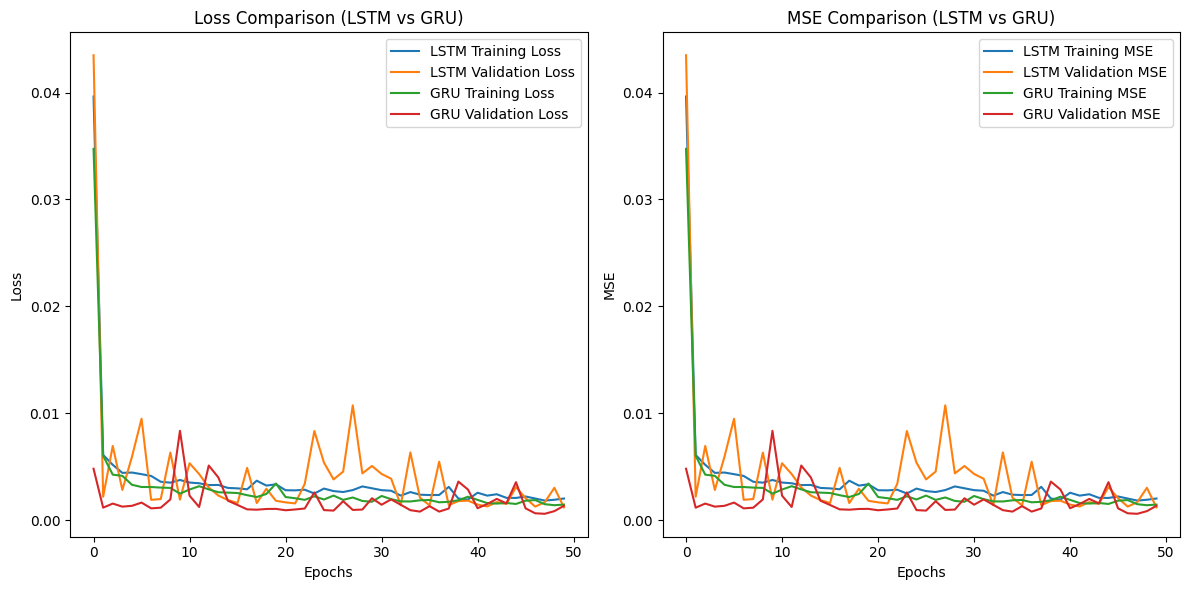

In [ ]:
import matplotlib.pyplot as plt

# Plotting the loss and MSE for both the LSTM and GRU models
plt.figure(figsize=(12, 6))

# Plotting the training and validation loss for LSTM
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.plot(history_gru.history['loss'], label='GRU Training Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.title('Loss Comparison (LSTM vs GRU)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation MSE for LSTM
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mean_squared_error'], label='LSTM Training MSE')
plt.plot(history_lstm.history['val_mean_squared_error'], label='LSTM Validation MSE')
plt.plot(history_gru.history['mean_squared_error'], label='GRU Training MSE')
plt.plot(history_gru.history['val_mean_squared_error'], label='GRU Validation MSE')
plt.title('MSE Comparison (LSTM vs GRU)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Print final training and validation MSE for both LSTM and GRU models
print(f"Final Training MSE for LSTM: {history_lstm.history['mean_squared_error'][-1]}")
print(f"Final Validation MSE for LSTM: {history_lstm.history['val_mean_squared_error'][-1]}")

print(f"Final Training MSE for GRU: {history_gru.history['mean_squared_error'][-1]}")
print(f"Final Validation MSE for GRU: {history_gru.history['val_mean_squared_error'][-1]}")


Final Training MSE for LSTM: 0.002027366776019335
Final Validation MSE for LSTM: 0.0011939394753426313
Final Training MSE for GRU: 0.0014577758265659213
Final Validation MSE for GRU: 0.0013489042175933719


In [ ]:
# Extracting real prices
real_stock_price = df_test[TARGET].values

# Preparing input data for making predictions
df_total = pd.concat([df_train, df_test], axis=0)
inputs = df_total[len(df_total) - len(df_test) - TIMESTEP:][PREDICTORS]

inputs = sc.transform(inputs)

X_test = []
for i in range(TIMESTEP, TIMESTEP + len(df_test)):
    X_test.append(inputs[i - TIMESTEP:i, :])
X_test = np.array(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [ ]:
predicted_stock_price = regressor.predict(X_test)

# to perform inverse scaler transformation, at first we need to transform
# 1-dimensional array with predicted prices to 2-dim array of size N x K,
# where N = number of observations/predictions.
# K = number of predictors

temp_matrix = np.zeros((len(predicted_stock_price), len(PREDICTORS)))
temp_matrix[:,target_col_index:target_col_index+1] = predicted_stock_price  # temp_matrix[:,[target_col_index]] = predicted_stock_price

predicted_stock_price = sc.inverse_transform(temp_matrix)[:,target_col_index]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


In [ ]:
predicted_stock_price1 = regressor1.predict(X_test)

# to perform inverse scaler transformation, at first we need to transform
# 1-dimensional array with predicted prices to 2-dim array of size N x K,
# where N = number of observations/predictions.
# K = number of predictors

temp_matrix = np.zeros((len(predicted_stock_price1), len(PREDICTORS)))
temp_matrix[:,target_col_index:target_col_index+1] = predicted_stock_price1  # temp_matrix[:,[target_col_index]] = predicted_stock_price

predicted_stock_price1 = sc.inverse_transform(temp_matrix)[:,target_col_index]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


<ipython-input-37-2759ffa252b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted price lstm'] = predicted_stock_price
<ipython-input-37-2759ffa252b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted price gru'] = predicted_stock_price1


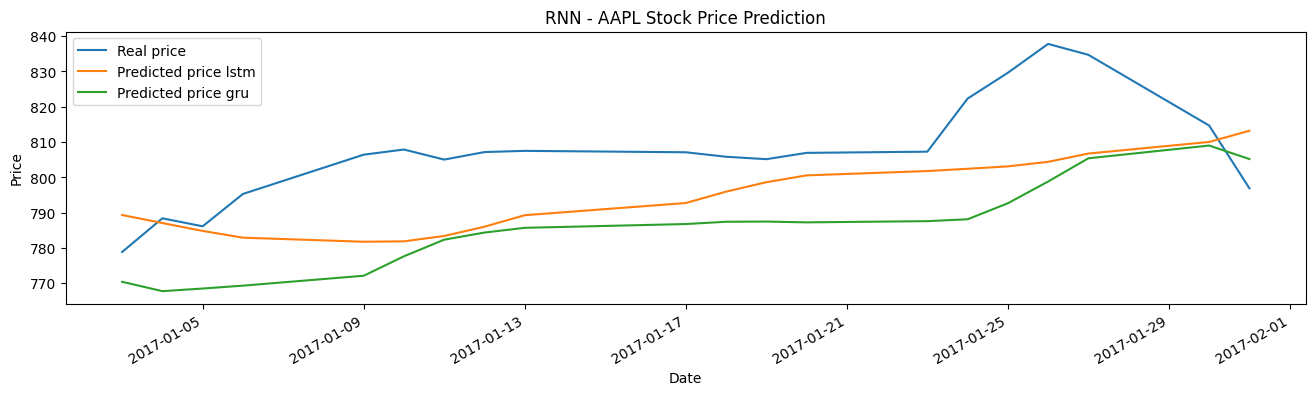

In [ ]:
#df_predicted = pd.DataFrame(index=df_test.index)
#df_predicted[TARGET] = predicted_stock_price

df_test['Predicted price lstm'] = predicted_stock_price
df_test['Predicted price gru'] = predicted_stock_price1

df_test[TARGET].plot(figsize=(16,4),legend=True)
df_test['Predicted price lstm'].plot(figsize=(16,4),legend=True)
df_test['Predicted price gru'].plot(figsize=(16,4),legend=True)
plt.legend(['Real price', 'Predicted price lstm','Predicted price gru' ])
plt.title('RNN - ' + SHARE + ' Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()